# Tarea 6 - Machine Learning

In [4]:
# Funciones y librerias
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import xgboost as xgb

In [13]:
spambase['data']['original']

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [19]:
df = spambase['data']['original']

In [21]:
df_reset = df.reset_index().rename(columns={'index': 'email'})

In [23]:
df_reset.head(5)

,email,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Ejercicio 1

La regresión logística es uno de los métodos de aprendizaje automático que se utiliza para resolver problemas de calificación binaria de una manera muy eficiente. Identifica una situación real (centro laboral, negocio, hogar) de la cual puedas adquirir una considerable cantidad de datos y que represente una problemática de clasificación binaria, por ejemplo: (0,1), (sí/no), (continuar/detener), entre otras. Elabora un programa en Python donde, a partir del análisis previo del comportamiento de los datos, puedas elaborar un modelo capaz de predecir el resultado adecuado para nuevas condiciones que se puedan presentar.

**Datos utilizados para el ejercicio**

UC Irvine es un directorio utilizado para programas de Machine Learning, donde hay una gran cantidad de datasets que son utilizados para ejercicios de machine learning. En este caso, con el fin de seguir con una situación real y tener una cantidad considerable de datos, utilicé un dataset que contiene información de emails y si estos fueron clasificados como spam o no. Comenzando con el análisis, mostraré un encabezado de cómo se ve la información para después realizar un EDA (Exploratory Data Analysis). En caso de requerir instalación, se tiene que instalar el paquete de datos de la siguiente manera.

*pip install ucimlrepo*

*from ucimlrepo import fetch_ucirepo*

In [74]:
# fetch dataset 
spambase = fetch_ucirepo(id=94) # El id=94 es referido al repositorio que se utilizará en este ejercicio
df = spambase['data']['original']

In [25]:
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [22]:
df.shape

(4601, 58)

Con un total de 4,601 registros, donde cada registro correponde a un email diferente, se cuenta con 57 datos que representan la información de los correos registrados y una columna final con nombre *Class* que corresponde al target. La info del resto de las variables es el siguiente:

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

En general, la mayoría de las variables son presentadas por probabilidades, en donde se muestra la frecuencia de alguna variable, caracter, palabra, si se refiere a un tema en especifico, etc. Por ejemplo:

- Se cuentan con 48 variables continuas que en caso que se mencione'WORD' n número de veces y el correo cuente con p palabras, se realiza la siguiente operación: $\texttt{work\_freq\_make} = n / p$.
- 3 variables enteras, donde se considera el númer total, promedio redondeado y número máximo de mayusculas en el correo.
- 1 variable tipo clasificatoria, siendo el target del dataset.

EDA

Class
0    2788
1    1813
Name: count, dtype: int64


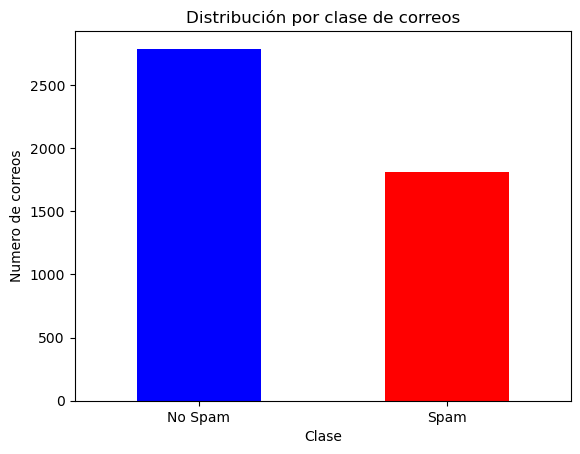

In [55]:
spam_not = df['Class'].value_counts()
print(spam_not)
spam_not.plot(kind='bar', color = ['blue', 'red'])

plt.title('Distribución por clase de correos')
plt.xlabel('Clase')
plt.ylabel('Numero de correos')
plt.xticks([0,1], ['No Spam', 'Spam'], rotation=0)
plt.show()

<Axes: >

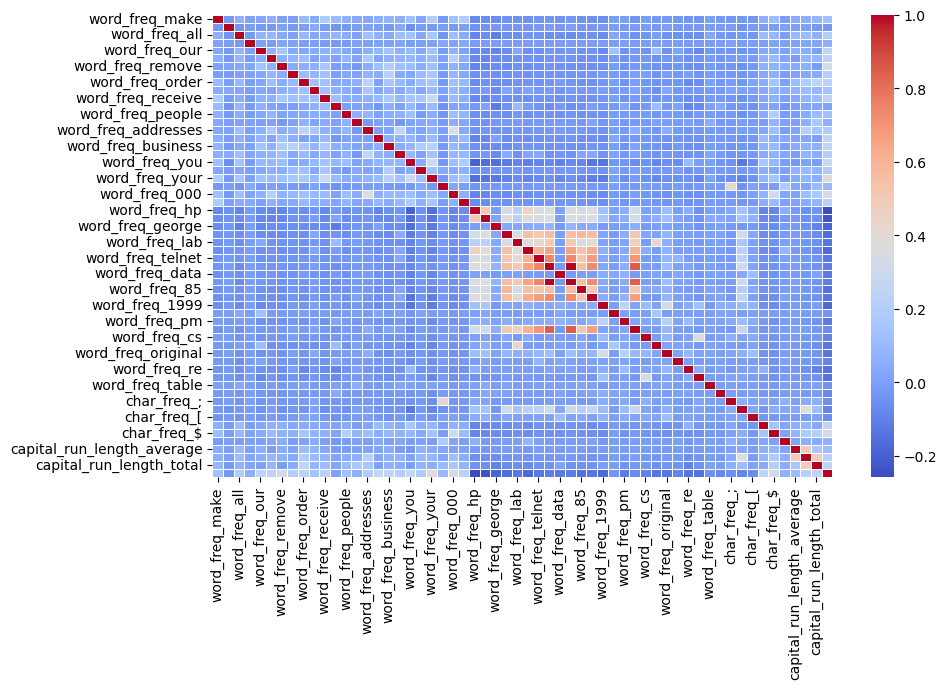

In [67]:
#correlación entre variables
mat_cor = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(mat_cor, cmap='coolwarm', linewidths=0.5)

Para lograr entender mejor el gráfico de correlación, habrá que recordar la interpretación de dicho resultado:

Los valores de la correlación varían entre -1 y 1:

- 1: La correlación es positiva, es decir, si una variable aumenta, la otra también.
- -1: La correlación es negativa, es decir, si una variable aumenta, la otra disminuye.
- 0: La correlación es nula.

El set tiene mayor correlación en las variables de frecuencia de las palabras 'hp', 'george', 'lab', 'telnet', 'data', '85' y 'cs'. Dando un poco de inferencia a que se esté hablando de correos de ciencia.

Por último, identificar el orden del promedio de frecuencia de palabras en todos los correos, es decir, qué palabra es la que menos repeticiones promedias tuvo en el set, y qué palabra es la que más menciones promedias tiene en todos los promedios.

In [297]:
temp = df.iloc[:,0:48].sum()/4601
temp = pd.DataFrame(temp.reset_index())

temp = temp.sort_values(0).reset_index().drop(columns = ['level_0']).rename(columns = {0:'freq'})

temp_min = temp.iloc[0]
_,_, word = temp_min['index'].rpartition('_')
print(f'El caracter con menor frecuencia en el set es: {word} con una frecuencia de {temp_min['freq']} en todos los correos')

temp_max = temp.iloc[47]
_,_, word = temp_max['index'].rpartition('_')
print(f'El caracter con mayor frecuencia en el set es: {word} con una frecuencia de {temp_max['freq']} en todos los correos')

El caracter con menor frecuencia en el set es: table con una frecuencia de 0.005444468593783961 en todos los correos
El caracter con mayor frecuencia en el set es: you con una frecuencia de 1.662099543577483 en todos los correos


In [299]:
temp

,index,freq
0,word_freq_table,0.005444
1,word_freq_parts,0.013201
2,word_freq_conference,0.031869
3,word_freq_cs,0.043667
4,word_freq_original,0.046099
5,word_freq_857,0.047048
6,word_freq_415,0.047835
7,word_freq_addresses,0.049205
8,word_freq_report,0.058626
9,word_freq_receive,0.059824


Con toda la información analizada y depurada, podemos realizar el entrenamiento del set de datos para predicción de futuros correos y determinar si estos son spam o no.

In [76]:
#Dividir la información en X y Y, donde X es todo el muestreo de datos y Y es el target (Class)
X = df.drop(columns = ['Class'])
y = df['Class']

#Train 80%, Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [310]:
print(f'Tamaño de X_train {X_train.shape}, Tamaño de X_Test: {X_test.shape}')

Tamaño de X_train (3680, 57), Tamaño de X_Test: (921, 57)


In [ ]:
model = LogisticRegression(max_iter = 10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Ejercicio 2

Investiga sobre las diferentes métricas que se utilizan para evaluar el desempeño de un modelo de aprendizaje automático y desarrolla una metodología que te permita extender ese análisis a cualquier tipo de solución elaborada. Aplica este procedimiento al modelo elaborado en la pregunta 1 y registra tus conclusiones en un documento electrónico de la actividad.

In [328]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
class_report = classification_report(y_test, y_pred)
print(f'Classification report \n{class_report}')

Accuracy: 0.9229098805646037

Classification report 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       531
           1       0.93      0.88      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



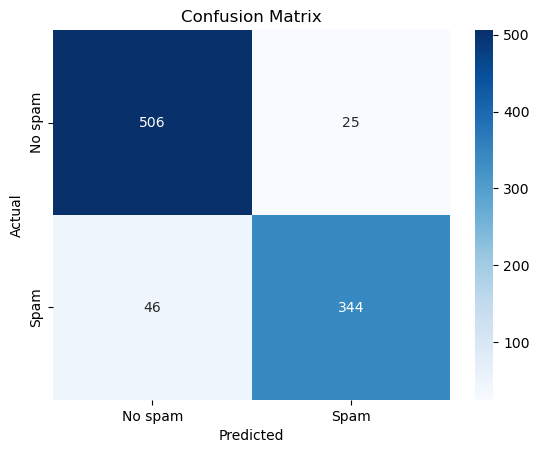

In [332]:
#Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No spam", "Spam"], yticklabels=["No spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Conclusiones de las métricas del modelo**

Como se observa en los resultados de la matriz de confusión, contamos con:

- VP (Verdaderos Positivos) *344* correos, es decir, se predijo que serían spam y fueron spam.
- VN (Verdaderos negativos) *506* correos, es decir, se predijo que no serían spam y no fueron spam.
- FP (Falsos Positivos) *25* correos, es decir, se predijo que serían spam y no fueron spam.
- FN (Falsos negativos) *46* correos, es decir, se predijo que no serían spam y fueron spam.

Como se observa en los resultados, el modelo contiene una buena precisión, pues del total del set de test (921 correos), 850 (VP + VN) los clasifica de manera correcta, dando un resultado de precisión de 92%. 

Si consideramos que lo importante de este modelo es tener mayor precisión en los correos más que exactitud en los mismos, el modelo está realizando un trabajo correcto. Aunque, aún así se cuenta con una exactitud alta, por ello el F1-Score refleja un alto valor.

Por último, guardamos el modelo por si se vuelve a utilizar

In [340]:
joblib.dump(model, 'Tarea6_ML - spam_correos.joblib')

['spam_correos.joblib']

In [6]:
load_model = joblib.load('Tarea6_ML - spam_correos.joblib')

## Ejercicio 3

Analiza nuevamente la problemática identificada en la pregunta 1 y responde estas preguntas:

a. ¿Se puede resolver mediante un modelo de árbol de decisión?

b. ¿Consideras posible extender el análisis inicial, a una situación donde pudieran estar involucradas nuevas variables de salida?¿Cómo lo harías?

Partiendo de las respuestas que obtuviste después de realizar el análisis, elabora un nuevo modelo en Python que solucione la problemática con las nuevas condiciones, pero en esta ocasión utiliza el modelo de árbol de decisión que mejor se adecúe a estas.

Aplicar un modelo diferente es siempre una mejor opción al momento de realizar una predicción de datos, esto con el fin de comparar los resultados entre distintos métodos aplicados. En este caso, utilizaré un XGBoost, el cual es un método de clasificación binaria utilizando árboles aleatorios.

In [86]:
df.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in df.columns]

X = df.drop(columns = ['Class'])
y = df['Class']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [90]:
#Modelo XGBoost
model = xgb.XGBClassifier(eval_metric = 'mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [92]:
y_pred = model.predict(X_test)

In [96]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
class_report = classification_report(y_test, y_pred)
print(f'Classification report \n{class_report}')

Accuracy: 0.9587255611875453

Classification report 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       804
           1       0.96      0.94      0.95       577

    accuracy                           0.96      1381
   macro avg       0.96      0.96      0.96      1381
weighted avg       0.96      0.96      0.96      1381



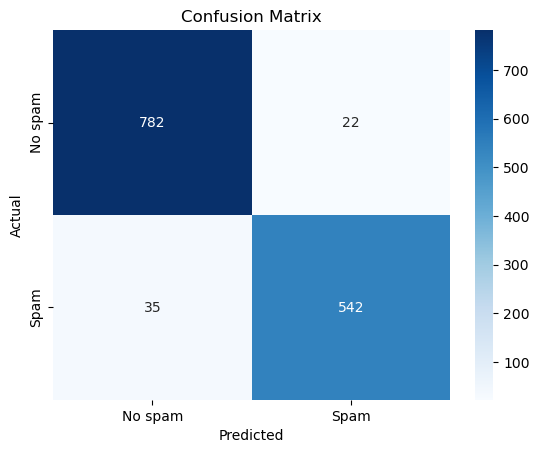

In [98]:
#Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No spam", "Spam"], yticklabels=["No spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [105]:
joblib.dump(model, 'Tarea6_ML - spam_correos_xgb.joblib')

['spam_correos_xgb.joblib']

XGBoost nos ofrece una manera de representar cómo actúan las variables sobre el modelo, en caso que se aumente o decremente el valor de alguna variable y si esta refleja sobre si se elige el valor de la clase positiva o negativa, es el *shap_values* y el *feature importance*, el cual refleja las variables más relevantes para el modelo.

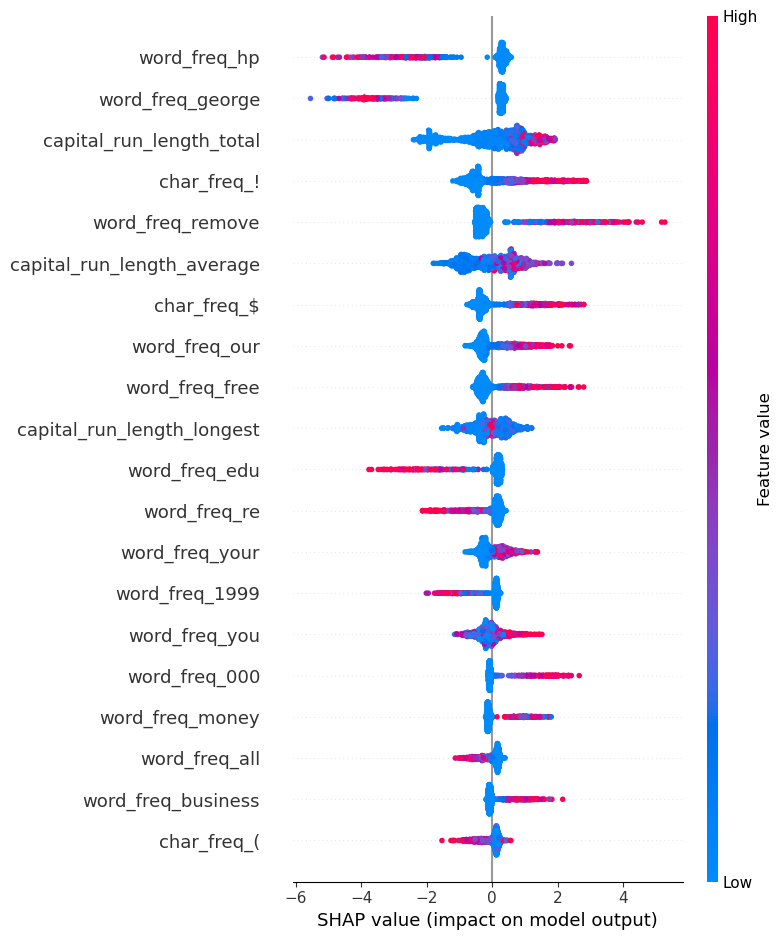

In [113]:
#Primero se generea el arbol explicativo
explainer = shap.TreeExplainer(model)

#Se toma el set de prueba
shap_values = explainer.shap_values(X_test)

#Se genera la prueba
shap.summary_plot(shap_values, X_test)

**Explicacion**

El gráfico muestra el impacto que genera las variables y las acomoda por correo, es decir, cada punto que se ve en el gráfico, representará un correo y en este caso, el valor de al variable. 

La primer variable, *word_freq_hp*, explica que, mientras mayor sea el valor de esa variable (mientras más palabras 'hp' aparezcan en el correo) afecta negativamente al modelo.

Por otro lado, la variable *word_freq_remove*, si es mayor, afecta positivamente al modelo.

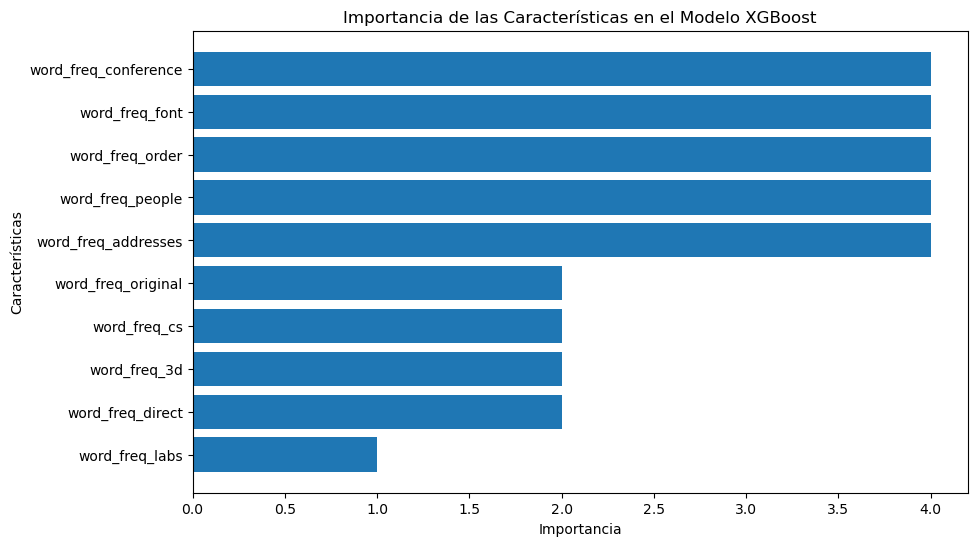

In [122]:
feature_importance = model.get_booster().get_score(importance_type='weight')

# Convertir a DataFrame para facilitar la visualización
feature_importance_df = pd.DataFrame({
    'Feature': list(feature_importance.keys()),
    'Importance': list(feature_importance.values())
})

# Ordenar por la importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

top_ten = feature_importance_df.head(10)

# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(top_ten['Feature'], top_ten['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en el Modelo XGBoost')
plt.show()

**Interpretacion**

El gráfico de feature importance presenta la importancia de las variables al momento de clasificar a los clientes. Es decir, la variable más relevante para el modelo es *word_freq_conference*, procedido por *word_freq_font* y así sucesivamente. Usualmente este tipo de gráficos ayuda a determinar qué variables son relevantes para el modelo y cuáles no en caso de requerir reentrenar el modelo.

**Conclusiones XGBoost**

El modelo de XGBoost presenta una mejor predicción para los valores previamente evaluados, inicialmente con una precisión más alta sobre los correos predichos como spam y como no spam, del total de 1,381 correos evaluados en el set de prueba, 1,324 fueron predichos con exactitud. Dando una precisión de 96%

## Ejercicio 4

Con la metodología desarrollada en la pregunta 2, evalúa el desempeño del nuevo modelo y compáralo con los resultados obtenidos en su homólogo de regresión logística (pregunta 1) para la problemática original.

**Conclusiones finales**

Es claro cómo el modelo de *XGBoost* tiene una mejor reacción ante el mismo set de datos, tanto en precisión como exactitud.